In [17]:
#load('ChainedList.py', 'ZFSearchMetagraphNewAlg.py', 'BFS.py','DijkstraMetagraph.py')
load('DijkstraMetagraphPostClose.py', 'ZFSearchMetagraphNewAlgPostClose.py')

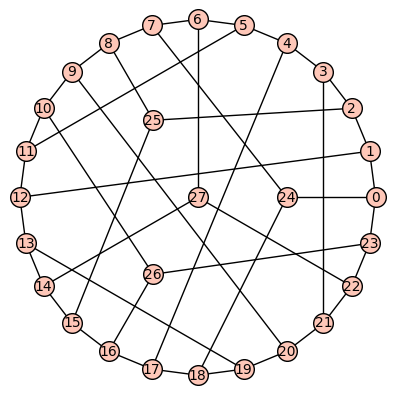



This graph has 28 vertices
[(frozenset([]), 18), (frozenset([24, 17, 18, 19]), 24), (frozenset([0, 17, 18, 19, 7, 24]), 11), (frozenset([0, 5, 7, 10, 11, 12, 17, 18, 19, 24]), 20), (frozenset([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), None)]
 set([0, 17, 18, 20, 24, 9, 10, 11, 12])


In [18]:
# Initialize a test graph and the associated ZFSearchMetagraph
#H = graphs.CubeGraph(5); H.relabel()
#H = graphs.PetersenGraph()
H = graphs.CoxeterGraph()       # DNF/DNF/1,284sec/339sec/220sec
#H = graphs.RobertsonGraph()     # DNF
#H = graphs.HeawoodGraph()       # 1.46/~1.20sec/1.03sec/0.22sec/0.16sec/0.12sec
#H = graphs.BrinkmannGraph()     # DNF/DNF/66.5sec/43.3sec/29.81sec/25.97sec
#H = graphs.HoffmanGraph()       # ~19sec/~13.7sec/2.57sec/2.00sec/1.6sec
#H = graphs.ClebschGraph()       # DNF/36.3sec/12.8sec/7.8sec/6.7sec/4.8sec/4.22sec/2.90sec
#H = graphs.DesarguesGraph()     # 14.56sec/8.00sec/5.6sec
#H = graphs.DodecahedralGraph()  # ~25.9sec/~8.9sec/~4.2sec/3.02sec/2.90sec/2.12sec/1.07sec/0.80sec
#H = graphs.HoffmanGraph().complement()
#H = graphs.CompleteGraph(16)
#H = graphs.MycielskiGraph(5)
#H = graphs.RandomTree(22)
#H = graphs.PathGraph(30)
#H = graphs.StarGraph(4)

#d = {0: [1,2,4], 1: [0,2,5], 2: [0,1,3], 3: [2,4,5], 4: [0,3,5], 5: [1,3,4]}
#H = Graph(d)
if H.num_verts() < 50:
    H.show()

metaGraph = ZFSearchMetagraphNewAlg(H)
#metaGraph = ZFSearchMetagraph(H)
print "\n"
print "This graph has", H.num_verts(), "vertices"
all_unfilled = frozenset([])
all_filled = frozenset(range(H.num_verts()))
#print all_unfilled
#print all_filled
%prun output = dijkstra(metaGraph, all_unfilled, all_filled)
print output
#print "Zero forcing number:", len(output)
#print "Zero forcing set:   ", list(output)
#print dijkstra(metaGraph, all_unfilled, all_filled)


In [3]:
previous = {frozenset([1,2,3]): 19}
current = frozenset([1,2])
if current.issubset(previous.keys()[0]):
    print "ok"
if len(previous) > 0 and current.issubset(i for i in previous):
    print "yay"
print(frozenset(i for i in previous))

ok
frozenset([frozenset([1, 2, 3])])


In [4]:
len(queueueue)

NameError: name 'queueueue' is not defined

In [3]:
metaGraph = ZFSearchMetagraphNewAlg(H)
#metaGraph = ZFSearchMetagraph(H)
print "\n"
print "This graph has", H.num_verts(), "vertices"
all_unfilled = frozenset([])
all_filled = frozenset(range(H.num_verts()))
#print all_unfilled
#print all_filled
%prun output = dijkstra(metaGraph, all_unfilled, all_filled)
#print "Zero forcing number:", len(output)
#print "Zero forcing set:   ", list(output)
print dijkstra(metaGraph, all_unfilled, all_filled)



This graph has 28 vertices


RuntimeError: maximum recursion depth exceeded in cmp



This graph has 10 vertices
Longest shortest path possible: 2


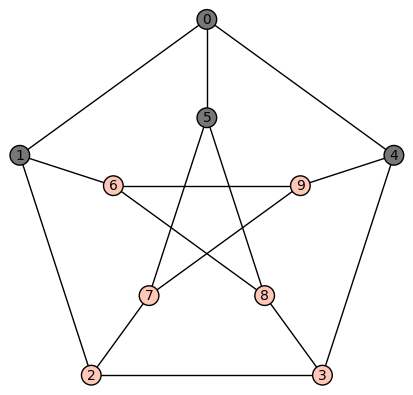

Neighbors of set([0, 1, 4, 5]) =
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 6
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 3
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 7
New metavertex: [0, 1, 4, 5] 	Cost of vertex 1 forcing: 5
New metavertex: [0, 1, 4, 5] 	Cost of vertex 1 forcing: 1
New metavertex: [0, 1, 4, 5] 	Cost of vertex 1 forcing: 4
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 8
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 9
New metavertex: [0, 1, 4, 5] 	Cost of vertex 2 forcing: 2


In [3]:
#NEIGHBORS TESTBED

# Initialize a test graph and the associated ZFSearchMetagraph
#N = graphs.CubeGraph(5); H.relabel()
N = graphs.PetersenGraph()
#N = graphs.CoxeterGraph()       # DNF/DNF/1,284sec/339sec/220sec
#N = graphs.RobertsonGraph()     # DNF
#N = graphs.HeawoodGraph()       # 1.46/~1.20sec/1.03sec/0.22sec/0.16sec/0.12sec
#N = graphs.BrinkmannGraph()     # DNF/DNF/66.5sec/43.3sec/29.81sec/25.97sec
#N = graphs.HoffmanGraph()       # ~19sec/~13.7sec/2.57sec/2.00sec/1.6sec
#N = graphs.ClebschGraph()       # DNF/36.3sec/12.8sec/7.8sec/6.7sec/4.8sec/4.22sec/2.90sec
#N = graphs.DesarguesGraph()     # 14.56sec/8.00sec/5.6sec
#N = graphs.DodecahedralGraph()  # ~25.9sec/~8.9sec/~4.2sec/3.02sec/2.90sec/2.12sec/1.07sec/0.80sec
#N = graphs.HoffmanGraph().complement()
#N = graphs.CompleteGraph(16)
#N = graphs.RandomTree(22)
#N = graphs.PathGraph(10000)

#d = {0: [1,2,4], 1: [0,2,5], 2: [0,1,3], 3: [2,4,5], 4: [0,3,5], 5: [1,3,4]}
#N = Graph(d)
#if N.num_verts() < 50:
  #  N.show()

metaGraph = ZFSearchMetagraphNewAlg(N)
#metaGraph = ZFSearchMetagraph(N)
print "\n"
print "This graph has", N.num_verts(), "vertices"
print "Longest shortest path possible:", N.diameter()
metavertex = set([0,1,5,4])
d = {'#777777':metavertex}
colored_graph = N.plot(vertex_colors = d)
colored_graph.show()
print "Neighbors of", metavertex, "=" 
for x in ZFSearchMetagraphNewAlg.neighbors_with_edges(metaGraph, frozenset(metavertex)):
    print "New metavertex:", list(x[2]), "\t", "Cost of vertex", x[0], "forcing:", x[1]

In [ ]:
print frozenset([1,2,3]) == [1,2,3]

In [4]:
A = set([])
B = set(A)
print(B)

set([])
